# Importing:

In [137]:
# munging imports
import pandas as pd 
import numpy as np

# visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,precision_recall_curve, roc_auc_score, roc_curve,classification_report, plot_confusion_matrix,f1_score,precision_recall_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier

# Collecting and Exploring:

In [2]:
df=pd.read_csv("cardio_train.csv", sep=';')
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [3]:
df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [4]:
cardio = df[df.cardio==1]
cardio.shape

(34979, 13)

In [5]:
cardio = df[df.cardio==0]
cardio.shape

(35021, 13)

In [6]:
# to check the data balance
df['cardio'].sum()/len(df) *100

49.97

In [7]:
df.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


#### Data features:

ID: id number, int

Age: Objective Feature,int, age in days

Gender: Objective Feature, int, gender in categorical code "Female=1 , Male=2"

Height: Objective Feature,int, height in cm

Weight: Objective Feature,float, weightin in kg

Systolic blood pressure: Examination Feature, int, ap_hi

Diastolic blood pressure: Examination Feature, int, ap_lo

Cholesterol: Examination Feature, int, cholesterol "normal=1 , above normal=2, well above normal=3"

Glucose: Examination Feature,int, gluc "normal=1, above normal=2, well above normal=3"

Smoking: Subjective Feature, int, smoke in binary "smoke=1, not smoke=0"

Alcohol intake: Subjective Feature,int, alco in binary "drink=1, not drink=0"

Physical activity: Subjective Feature, int, active in binary "active=1 , not active=0"

Presence or absence of cardiovascular disease: Target Variable, int, cardio in binary "cardiovascular disease=1, no cardiovascular disease=0"

In [8]:
df.describe()

id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250      0.572270      0.283484   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  70000.000000  70000.000000  70000.000000  
mean       0.053771      0.803729      0.499700  
std        0.225568      0.397179      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

#####  we can see that ap_hi has a min of  -150.000000 and ap_lo has min of -70.000000 which is wrong, there is no negative value of blood pressure. we can deticte that there is missing value.

##### also, min of weight is equal to 10km and min height is equal to 55cm for an adul. which in this case consedered as outliers and we can deal with it as replacing them with the mean of each of them depending on gender.

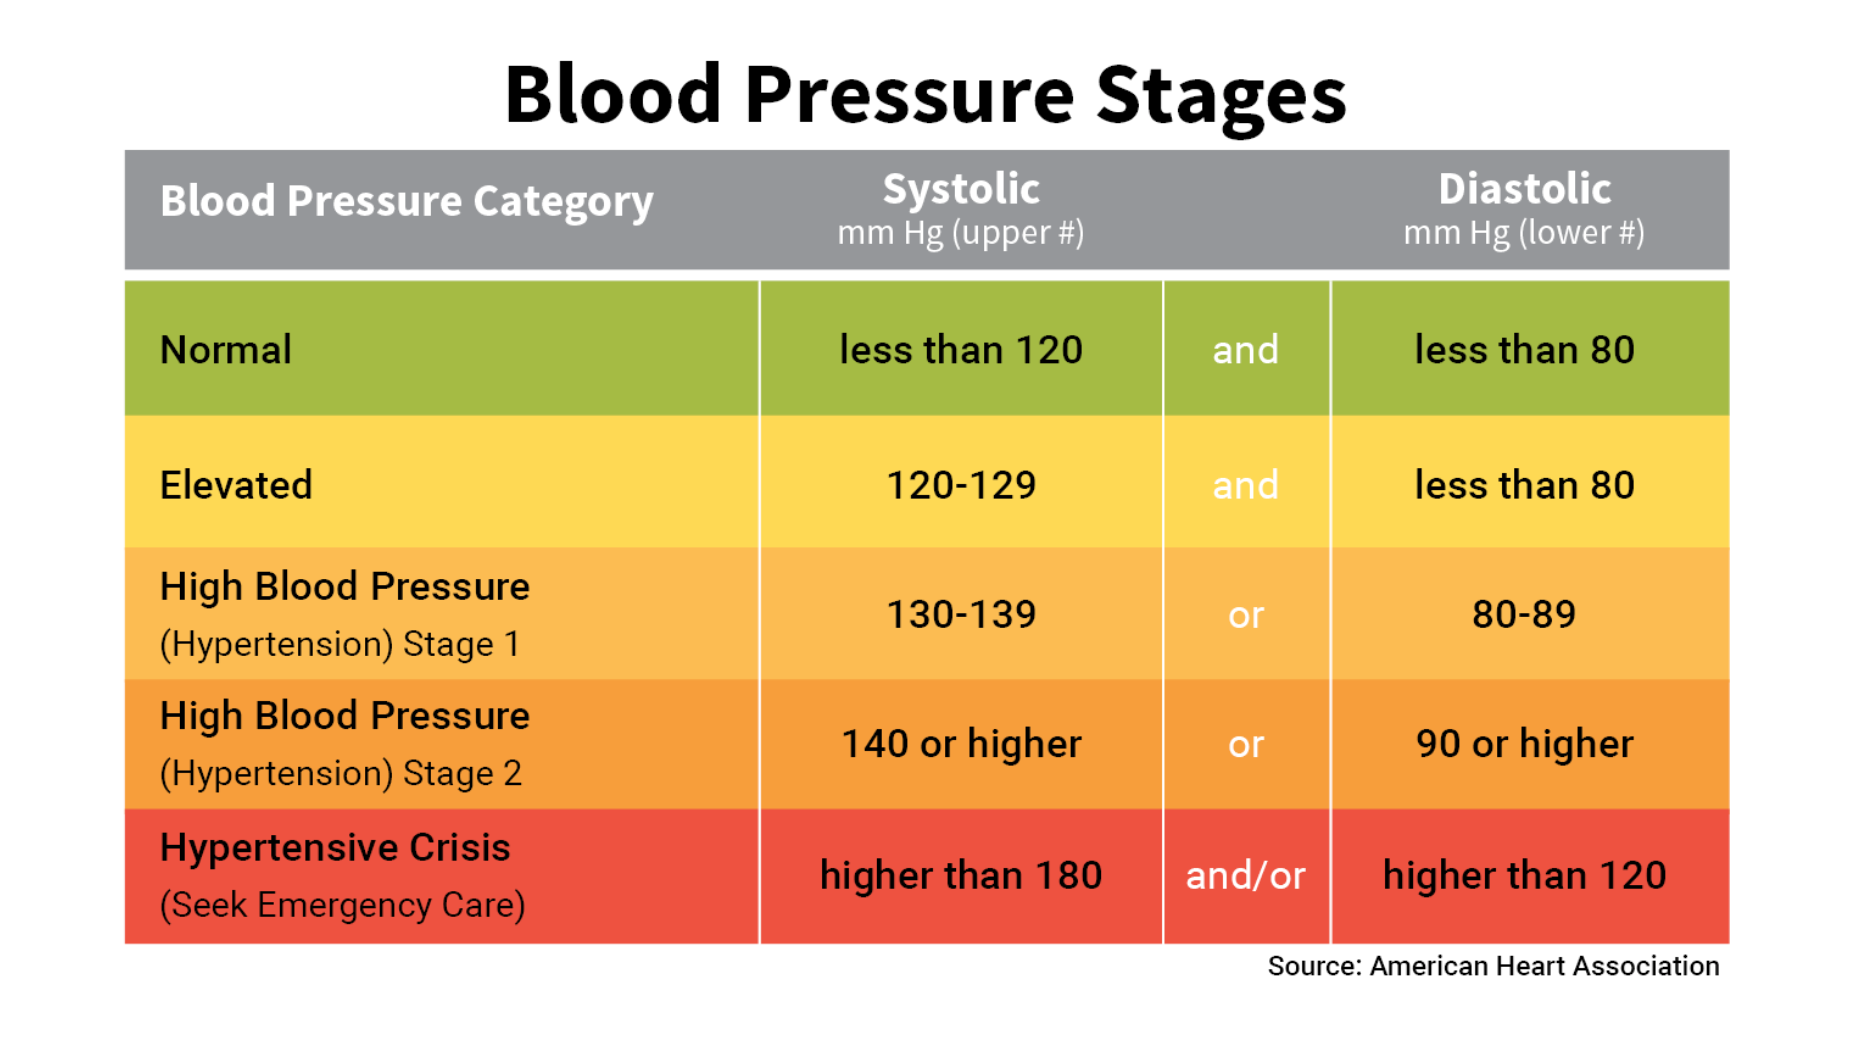

In [9]:
df.drop(df.query('ap_hi >220 or ap_lo >180 or ap_hi<40 or ap_lo<40').index, axis=0, inplace=True)

In [10]:
def bpstages(x,y):
    if x<=120 and y<=80:
        return 'normal'
    elif x<=129 and y<=80:
        return 'elevated'
    elif x<=139 or y<=89:
        return 'high stage 1'
    elif x<=180 or y<=120:
        return "high stage 2"
    elif x>180 or y>120:
        return 'hypertensive crisis'
    else:
        return None
    
df.insert(8, "BPC", df.apply(lambda row: bpstages(row['ap_hi'], row['ap_lo']), axis=1))
df['BPC'].value_counts()

#bpstages means blood pressure stages, and I categorized it according to the systolic and diastolic pressure.
#BPC means blood pressure categories, and I labled it based on the patients blood pressure like normal, elevated, high stage 1, high stage 2 or hypertensive crisis.

normal                 38895
high stage 1           15211
high stage 2           14211
elevated                 419
hypertensive crisis       28
Name: BPC, dtype: int64

In [11]:
df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol           BPC  \
0   0  18393       2     168    62.0    110     80            1        normal   
1   1  20228       1     156    85.0    140     90            3  high stage 2   
2   2  18857       1     165    64.0    130     70            3  high stage 1   
3   3  17623       2     169    82.0    150    100            1  high stage 2   
4   4  17474       1     156    56.0    100     60            1        normal   

   gluc  smoke  alco  active  cardio  
0     1      0     0       1       0  
1     1      0     0       1       1  
2     1      0     0       0       1  
3     1      0     0       1       1  
4     1      0     0       0       0

In [12]:
BPCD=pd.get_dummies(df.BPC)
df=pd.concat([df,BPCD], axis=1)

In [13]:
df.drop('BPC',axis='columns',inplace=True)

In [14]:
df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  elevated  high stage 1  high stage 2  \
0     0       1       0         0             0             0   
1     0       1       1         0             0             1   
2     0       0       1         0             1             0   
3     0       1       1         0             0             1   
4     0       0       0         0             0             0   

   hypertensive crisis  normal  
0                    0       1  
1                    0       0  
2                    0       0  
3                    0       0  
4                    0       1

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68764 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68764 non-null  int64  
 1   age                  68764 non-null  int64  
 2   gender               68764 non-null  int64  
 3   height               68764 non-null  int64  
 4   weight               68764 non-null  float64
 5   ap_hi                68764 non-null  int64  
 6   ap_lo                68764 non-null  int64  
 7   cholesterol          68764 non-null  int64  
 8   gluc                 68764 non-null  int64  
 9   smoke                68764 non-null  int64  
 10  alco                 68764 non-null  int64  
 11  active               68764 non-null  int64  
 12  cardio               68764 non-null  int64  
 13  elevated             68764 non-null  uint8  
 14  high stage 1         68764 non-null  uint8  
 15  high stage 2         68764 non-null 

In [16]:
df = df[df['height'] >= 150]
df[df['height'] > 200]

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
6486    9223  21220       1     250    86.0    140    100            3     1   
21628  30894  19054       2     207    78.0    100     70            1     1   

       smoke  alco  active  cardio  elevated  high stage 1  high stage 2  \
6486       0     0       1       1         0             0             1   
21628      0     1       1       0         0             0             0   

       hypertensive crisis  normal  
6486                     0       0  
21628                    0       1

In [17]:
df = df[df['weight'] >= 50]
df[df['weight'] > 190]

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
435      618  16765       1     186   200.0    130     70            1     1   
50413  71945  15117       2     180   200.0    150     90            1     1   

       smoke  alco  active  cardio  elevated  high stage 1  high stage 2  \
435        0     0       0       0         0             1             0   
50413      0     0       1       1         0             0             1   

       hypertensive crisis  normal  
435                      0       0  
50413                    0       0

In [18]:
df.drop(index=6486, inplace= True)

In [19]:
df.describe()

id           age        gender        height        weight  \
count  66465.000000  66465.000000  66465.000000  66465.000000  66465.000000   
mean   49900.863943  19455.305243      1.358158    164.915565     74.655809   
std    28834.131770   2464.135915      0.479463      7.420975     13.946706   
min        0.000000  10798.000000      1.000000    150.000000     50.000000   
25%    24948.000000  17652.000000      1.000000    160.000000     65.000000   
50%    49884.000000  19695.000000      1.000000    165.000000     72.000000   
75%    74758.000000  21312.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    207.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  66465.000000  66465.000000  66465.000000  66465.000000  66465.000000   
mean     126.705680     81.445392      1.363650      1.226555      0.089867   
std       16.601246      9.578097      0.678645      0.572770      0.285993   
min       60.000000     40.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      1.000000      1.000000      0.000000   
max      220.000000    180.000000      3.000000      3.000000      1.000000   

               alco        active        cardio      elevated  high stage 1  \
count  66465.000000  66465.000000  66465.000000  66465.000000  66465.000000   
mean       0.054540      0.802723      0.496698      0.006124      0.221335   
std        0.227082      0.397946      0.499993      0.078014      0.415148   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      1.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      0.000000      0.000000      0.000000   
75%        0.000000      1.000000      1.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       high stage 2  hypertensive crisis        normal  
count  66465.000000         66465.000000  66465.000000  
mean       0.207132             0.000421      0.564989  
std        0.405254             0.020521      0.495762  
min        0.000000             0.000000      0.000000  
25%        0.000000             0.000000      0.000000  
50%        0.000000             0.000000      1.000000  
75%        0.000000             0.000000      1.000000  
max        1.000000             1.000000      1.000000

In [20]:
df.drop('id',axis='columns',inplace=True) #id is unnecessary featuer

In [21]:
df['ageinyears'] = df['age'] / 365        #to change age from days to years
df= df.drop('age', axis=1)


In [22]:
df.rename({"ageinyears":"age"},axis=1, inplace=True)

In [23]:
df.sample(5)

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
67156       2     175    70.0    100     80            1     1      0     0   
5331        1     158    65.0    150     90            1     1      0     0   
48728       2     164    63.0    120     80            1     1      1     0   
6587        1     164    65.0    120     80            1     1      0     0   
63776       2     162    70.0    150     80            1     1      0     0   

       active  cardio  elevated  high stage 1  high stage 2  \
67156       1       0         0             0             0   
5331        0       1         0             0             1   
48728       1       0         0             0             0   
6587        0       0         0             0             0   
63776       1       1         0             1             0   

       hypertensive crisis  normal        age  
67156                    0       1  49.257534  
5331                     0       0  48.183562  
48728                    0       1  43.753425  
6587                     0       1  42.041096  
63776                    0       0  59.989041

In [24]:
df.isna()

gender  height  weight  ap_hi  ap_lo  cholesterol   gluc  smoke   alco  \
0       False   False   False  False  False        False  False  False  False   
1       False   False   False  False  False        False  False  False  False   
2       False   False   False  False  False        False  False  False  False   
3       False   False   False  False  False        False  False  False  False   
4       False   False   False  False  False        False  False  False  False   
...       ...     ...     ...    ...    ...          ...    ...    ...    ...   
69995   False   False   False  False  False        False  False  False  False   
69996   False   False   False  False  False        False  False  False  False   
69997   False   False   False  False  False        False  False  False  False   
69998   False   False   False  False  False        False  False  False  False   
69999   False   False   False  False  False        False  False  False  False   

       active  cardio  elevated  high stage 1  high stage 2  \
0       False   False     False         False         False   
1       False   False     False         False         False   
2       False   False     False         False         False   
3       False   False     False         False         False   
4       False   False     False         False         False   
...       ...     ...       ...           ...           ...   
69995   False   False     False         False         False   
69996   False   False     False         False         False   
69997   False   False     False         False         False   
69998   False   False     False         False         False   
69999   False   False     False         False         False   

       hypertensive crisis  normal    age  
0                    False   False  False  
1                    False   False  False  
2                    False   False  False  
3                    False   False  False  
4                    False   False  False  
...                    ...     ...    ...  
69995                False   False  False  
69996                False   False  False  
69997                False   False  False  
69998                False   False  False  
69999                False   False  False  

[66465 rows x 17 columns]

In [25]:
df.dtypes

gender                   int64
height                   int64
weight                 float64
ap_hi                    int64
ap_lo                    int64
cholesterol              int64
gluc                     int64
smoke                    int64
alco                     int64
active                   int64
cardio                   int64
elevated                 uint8
high stage 1             uint8
high stage 2             uint8
hypertensive crisis      uint8
normal                   uint8
age                    float64
dtype: object

In [26]:
# Gender: Female= 0  and Male=1
df['gender']=df['gender']-1

In [27]:
df.head()

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0       1     168    62.0    110     80            1     1      0     0   
1       0     156    85.0    140     90            3     1      0     0   
2       0     165    64.0    130     70            3     1      0     0   
3       1     169    82.0    150    100            1     1      0     0   
4       0     156    56.0    100     60            1     1      0     0   

   active  cardio  elevated  high stage 1  high stage 2  hypertensive crisis  \
0       1       0         0             0             0                    0   
1       1       1         0             0             1                    0   
2       0       1         0             1             0                    0   
3       1       1         0             0             1                    0   
4       0       0         0             0             0                    0   

   normal        age  
0       1  50.391781  
1       0  55.419178  
2       0  51.663014  
3       0  48.282192  
4       1  47.873973

In [28]:
df.describe().T[0:]

count        mean        std         min         25%  \
gender               66465.0    0.358158   0.479463    0.000000    0.000000   
height               66465.0  164.915565   7.420975  150.000000  160.000000   
weight               66465.0   74.655809  13.946706   50.000000   65.000000   
ap_hi                66465.0  126.705680  16.601246   60.000000  120.000000   
ap_lo                66465.0   81.445392   9.578097   40.000000   80.000000   
cholesterol          66465.0    1.363650   0.678645    1.000000    1.000000   
gluc                 66465.0    1.226555   0.572770    1.000000    1.000000   
smoke                66465.0    0.089867   0.285993    0.000000    0.000000   
alco                 66465.0    0.054540   0.227082    0.000000    0.000000   
active               66465.0    0.802723   0.397946    0.000000    1.000000   
cardio               66465.0    0.496698   0.499993    0.000000    0.000000   
elevated             66465.0    0.006124   0.078014    0.000000    0.000000   
high stage 1         66465.0    0.221335   0.415148    0.000000    0.000000   
high stage 2         66465.0    0.207132   0.405254    0.000000    0.000000   
hypertensive crisis  66465.0    0.000421   0.020521    0.000000    0.000000   
normal               66465.0    0.564989   0.495762    0.000000    0.000000   
age                  66465.0   53.302206   6.751057   29.583562   48.361644   

                            50%         75%         max  
gender                 0.000000    1.000000    1.000000  
height               165.000000  170.000000  207.000000  
weight                72.000000   82.000000  200.000000  
ap_hi                120.000000  140.000000  220.000000  
ap_lo                 80.000000   90.000000  180.000000  
cholesterol            1.000000    1.000000    3.000000  
gluc                   1.000000    1.000000    3.000000  
smoke                  0.000000    0.000000    1.000000  
alco                   0.000000    0.000000    1.000000  
active                 1.000000    1.000000    1.000000  
cardio                 0.000000    1.000000    1.000000  
elevated               0.000000    0.000000    1.000000  
high stage 1           0.000000    0.000000    1.000000  
high stage 2           0.000000    0.000000    1.000000  
hypertensive crisis    0.000000    0.000000    1.000000  
normal                 1.000000    1.000000    1.000000  
age                   53.958904   58.389041   64.967123

In here we can conclude that:

The percentage of males is 35% while the percentage of females is 65%.

The mean height of patients is 164.91 cm.

The mean weight of patients is 74.65 Kg.

The percentage of smokers is 8%.

The percentage of alcoholists is 5%.

The percentage of Active patients is 80%.

The mean age for patient is 53 years.

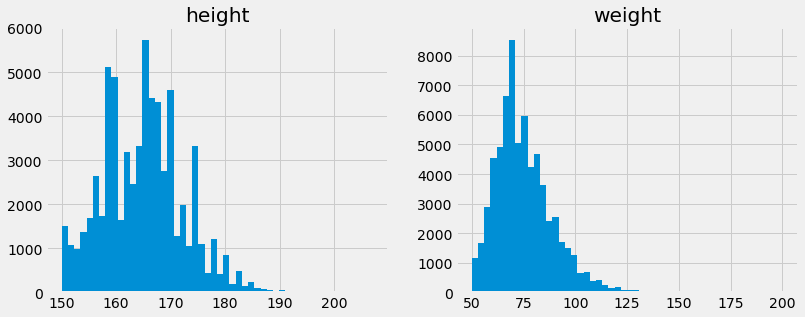

In [29]:
#to check if still we have outliers in height and weight
plt.figure(figsize=(12,10))

he= plt.subplot(221)
he= plt.hist(df['height'], bins=50)
he= plt.title('height')

we= plt.subplot(222)
we= plt.hist(df['weight'], bins=50)
we= plt.title('weight')


In [30]:
df.sample(6)

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
56404       0     157    58.0    120     80            1     1      0     0   
24057       0     162    85.0    150    100            1     1      0     0   
68380       0     155    88.0    120     80            3     3      0     0   
50809       0     154    70.0    115     70            1     1      0     0   
39021       1     165    84.0    140    100            1     1      0     0   
56666       1     164    82.0    180     99            3     3      0     0   

       active  cardio  elevated  high stage 1  high stage 2  \
56404       1       0         0             0             0   
24057       1       1         0             0             1   
68380       1       0         0             0             0   
50809       1       0         0             0             0   
39021       1       0         0             0             1   
56666       1       1         0             0             1   

       hypertensive crisis  normal        age  
56404                    0       1  56.627397  
24057                    0       0  49.265753  
68380                    0       1  64.210959  
50809                    0       1  46.202740  
39021                    0       0  62.452055  
56666                    0       0  61.498630

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66465 entries, 0 to 69999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               66465 non-null  int64  
 1   height               66465 non-null  int64  
 2   weight               66465 non-null  float64
 3   ap_hi                66465 non-null  int64  
 4   ap_lo                66465 non-null  int64  
 5   cholesterol          66465 non-null  int64  
 6   gluc                 66465 non-null  int64  
 7   smoke                66465 non-null  int64  
 8   alco                 66465 non-null  int64  
 9   active               66465 non-null  int64  
 10  cardio               66465 non-null  int64  
 11  elevated             66465 non-null  uint8  
 12  high stage 1         66465 non-null  uint8  
 13  high stage 2         66465 non-null  uint8  
 14  hypertensive crisis  66465 non-null  uint8  
 15  normal               66465 non-null 

In [32]:
df.duplicated().sum()   # to check if i have duplicate

24

In [33]:
df.drop_duplicates(inplace=True)   # to remove the duplicate rows

In [34]:
df.groupby('cardio').mean()

gender      height     weight       ap_hi      ap_lo  cholesterol  \
cardio                                                                        
0       0.355256  165.020846  72.220504  119.726215  78.279109     1.215253   
1       0.361268  164.809156  77.129092  133.781040  84.654184     1.514240   

            gluc     smoke      alco    active  elevated  high stage 1  \
cardio                                                                   
0       1.176402  0.094572  0.056528  0.817287  0.007866      0.159444   
1       1.277525  0.085166  0.052566  0.787948  0.004363      0.284191   

        high stage 2  hypertensive crisis    normal        age  
cardio                                                          
0           0.064483             0.000090  0.768117  51.714927  
1           0.351785             0.000757  0.358904  54.910578

In [35]:
df.age.describe()

count    66441.000000
mean        53.302436
std          6.751411
min         29.583562
25%         48.361644
50%         53.958904
75%         58.389041
max         64.967123
Name: age, dtype: float64

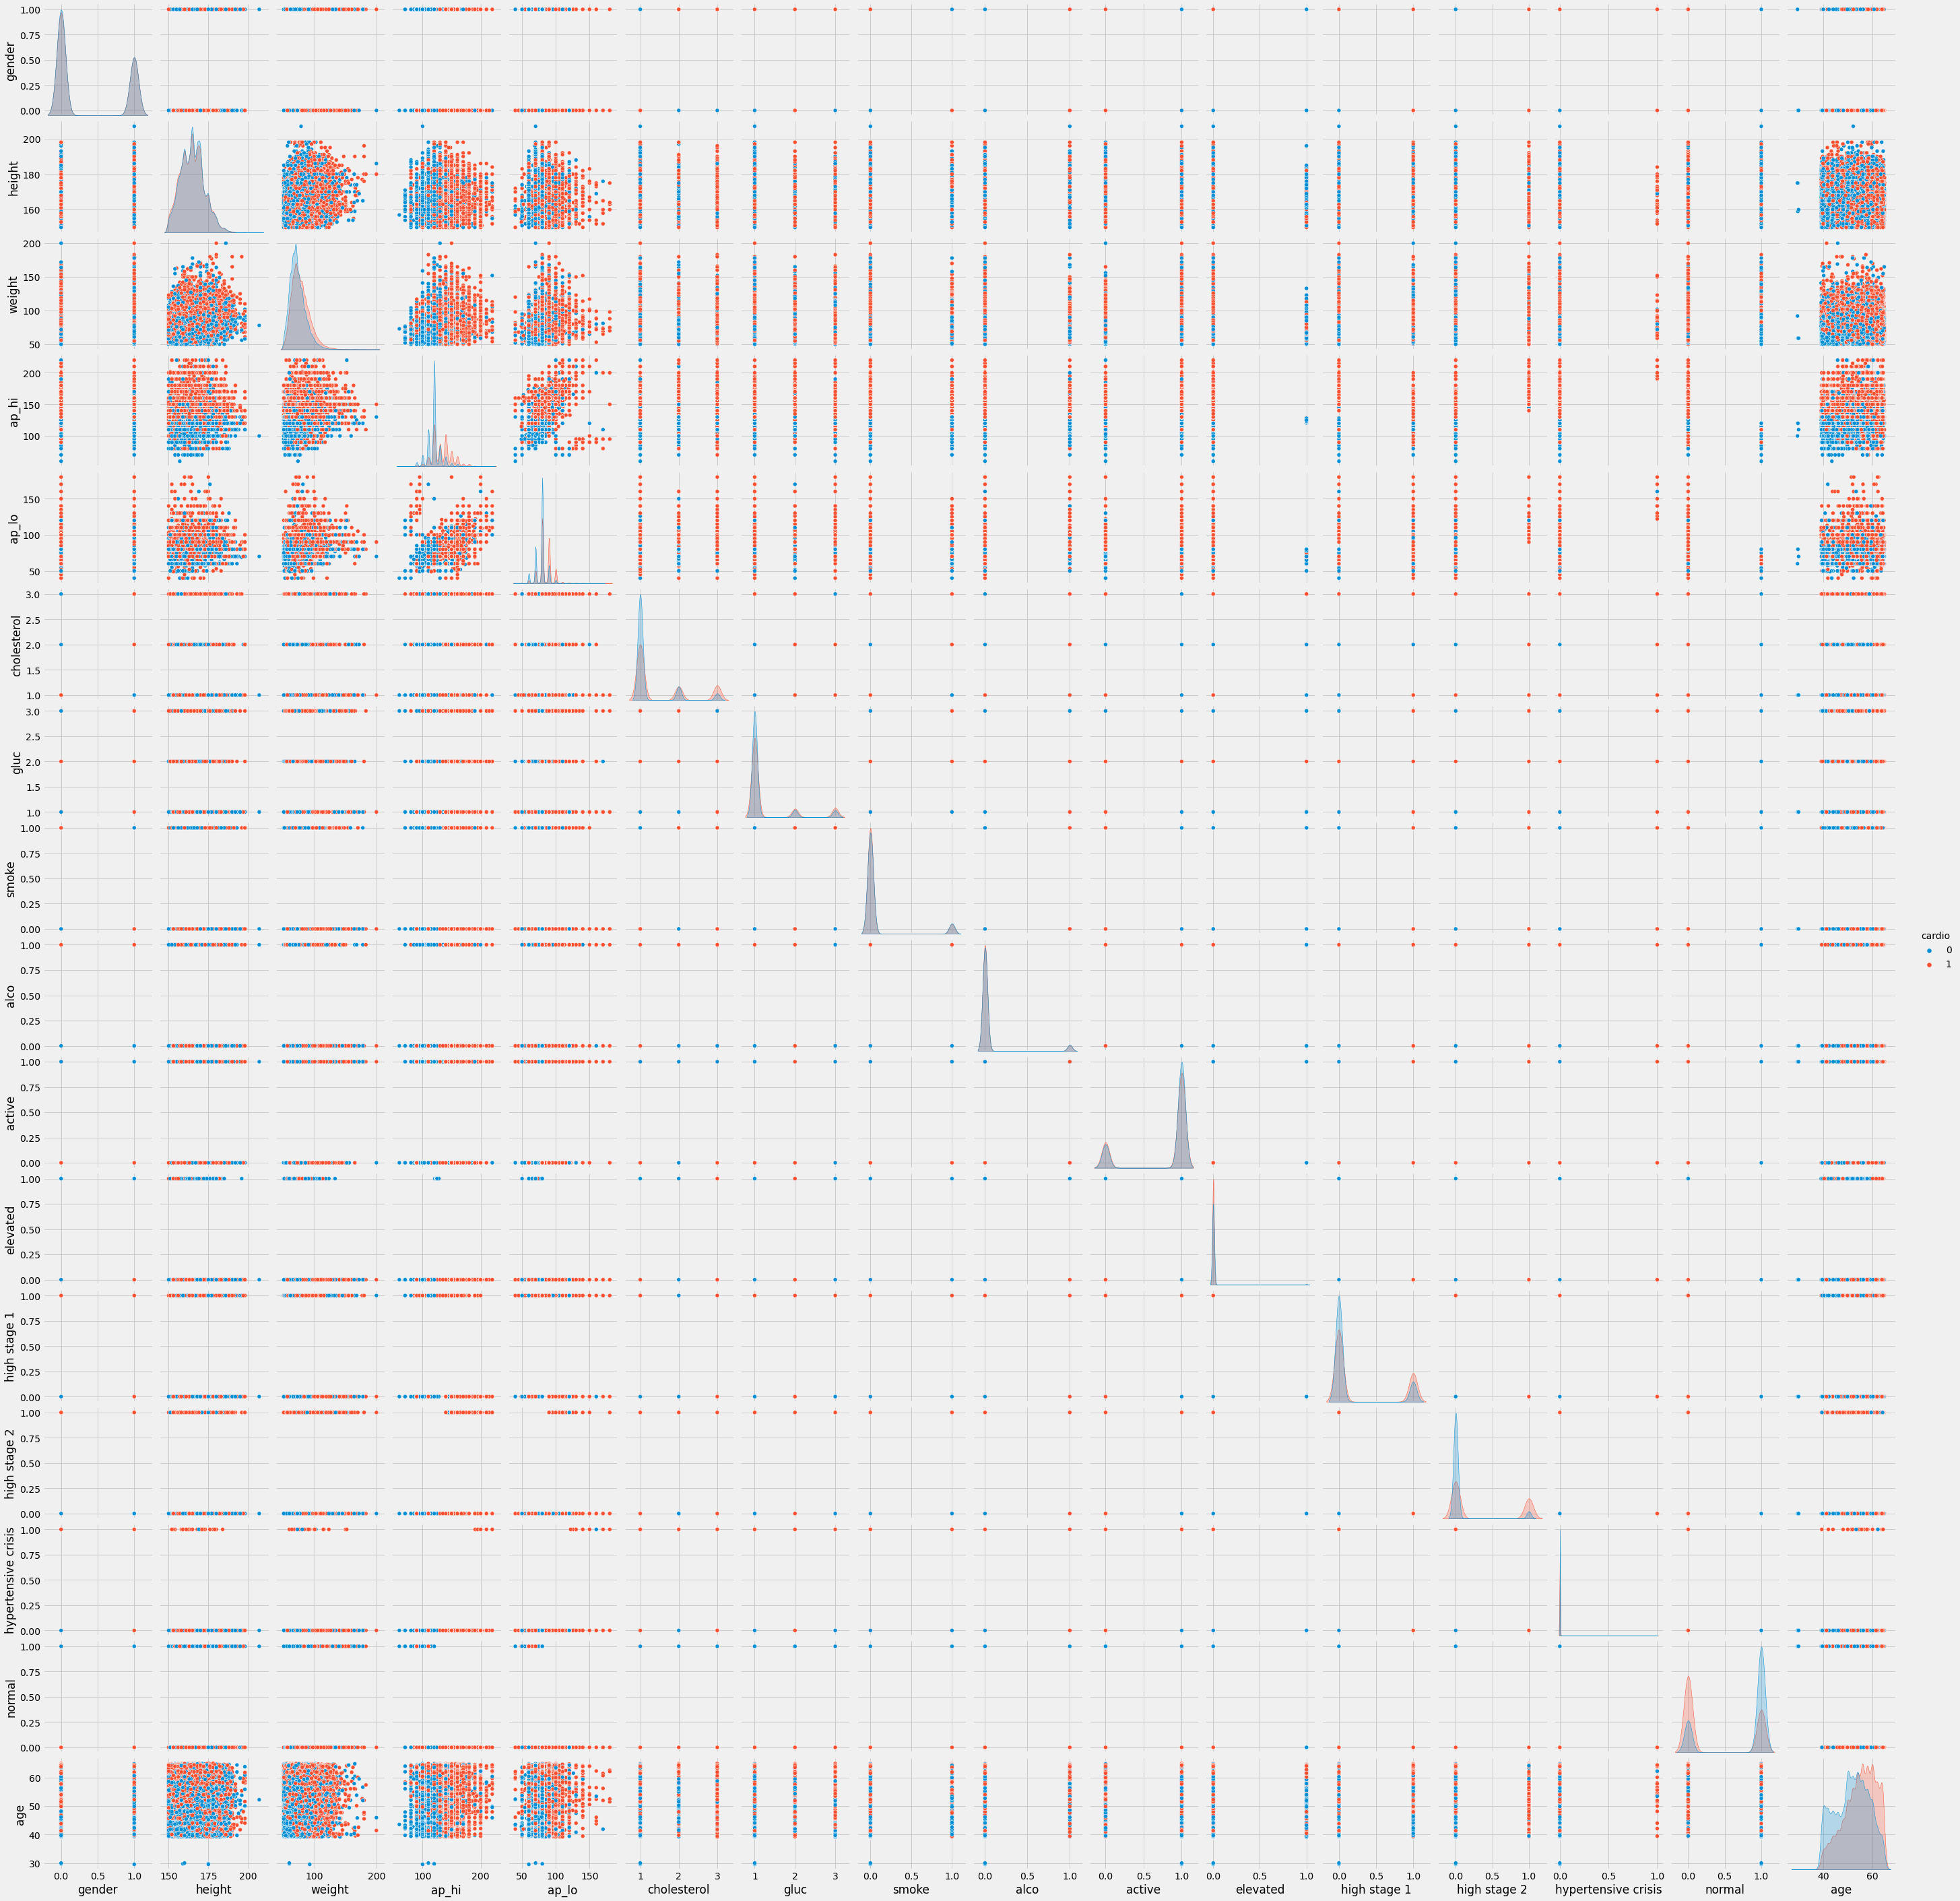

In [36]:
sns.pairplot(df, hue='cardio');

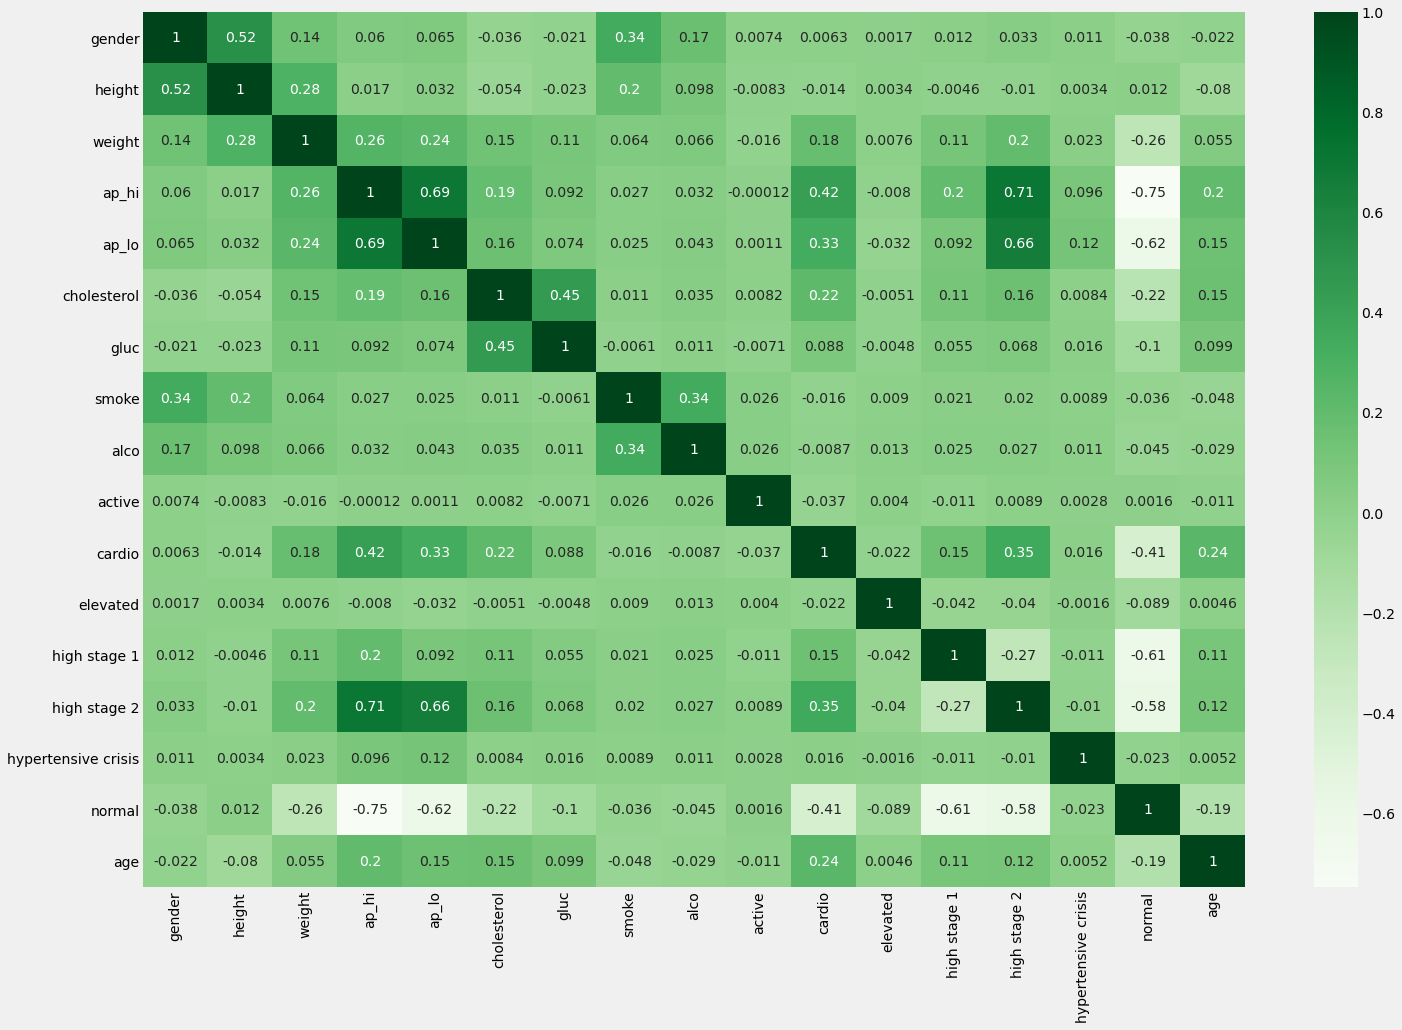

In [37]:
plt.figure(figsize=(22,15))
sns.heatmap(df.corr(),annot=True ,cmap='Greens')
plt.show()

Looking into the correlation heatmap, and it seems like our target has either positive or negative higher correlation with weight,ap_hi,ap_lo, cholesterol, high stage 1, high stage 2, normal, age.


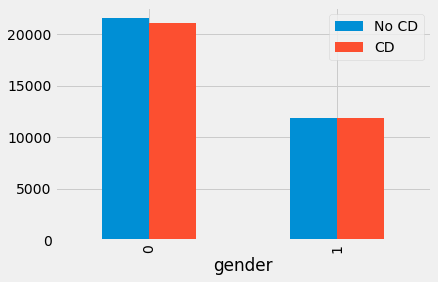

In [38]:
pd.crosstab(df['gender'], df['cardio']).plot(kind = 'bar')
plt.xlabel('gender')
plt.legend(['No CD','CD'],loc='upper right')
plt.show()

##### according to the plot and by ignoring that the number of female patients is slightly more than the number of male paitents, we can see that male in both cases of having or not having a heart disease is almost the same value while female who has a heart disease is slightly lower than females who have it. also by comparing between of gender, female patients are almost double than male patients.

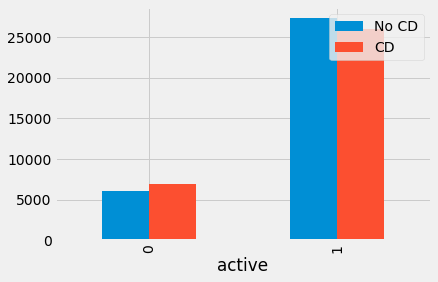

In [39]:
pd.crosstab(df['active'], df['cardio']).plot(kind = 'bar')
plt.xlabel('active')
plt.legend(['No CD','CD'],loc='upper right')
plt.show()

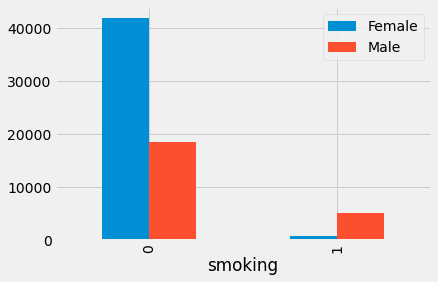

In [40]:
pd.crosstab(df['smoke'], df['gender']).plot(kind = 'bar')
plt.xlabel('smoking')
plt.legend(['Female','Male'],loc='upper right')
plt.show()

from the polt we can see that the number of Males smoker more than females smoker.

# Modeling:

In [82]:
X=df[['age','height','gender','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','high stage 1','high stage 2','normal','hypertensive crisis','elevated']]
y=df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=43)

In [83]:
train_df = X_train.copy()
train_df['cardio'] = y_train
train_df.head()

age  height  gender  weight  ap_hi  ap_lo  cholesterol  gluc  \
35109  52.679452     159       0    77.0    120     80            1     1   
16805  55.336986     161       1    68.0    130     80            3     1   
49481  57.797260     163       0    59.0    120     80            1     1   
42300  49.643836     176       1    81.0    140     90            3     3   
50493  43.397260     165       1    80.0    140     90            1     1   

       smoke  alco  active  high stage 1  high stage 2  normal  \
35109      0     0       1             0             0       1   
16805      0     0       1             1             0       0   
49481      0     0       1             0             0       1   
42300      0     0       1             0             1       0   
50493      0     0       0             0             1       0   

       hypertensive crisis  elevated  cardio  
35109                    0         0       0  
16805                    0         0       1  
49481                    0         0       1  
42300                    0         0       1  
50493                    0         0       0

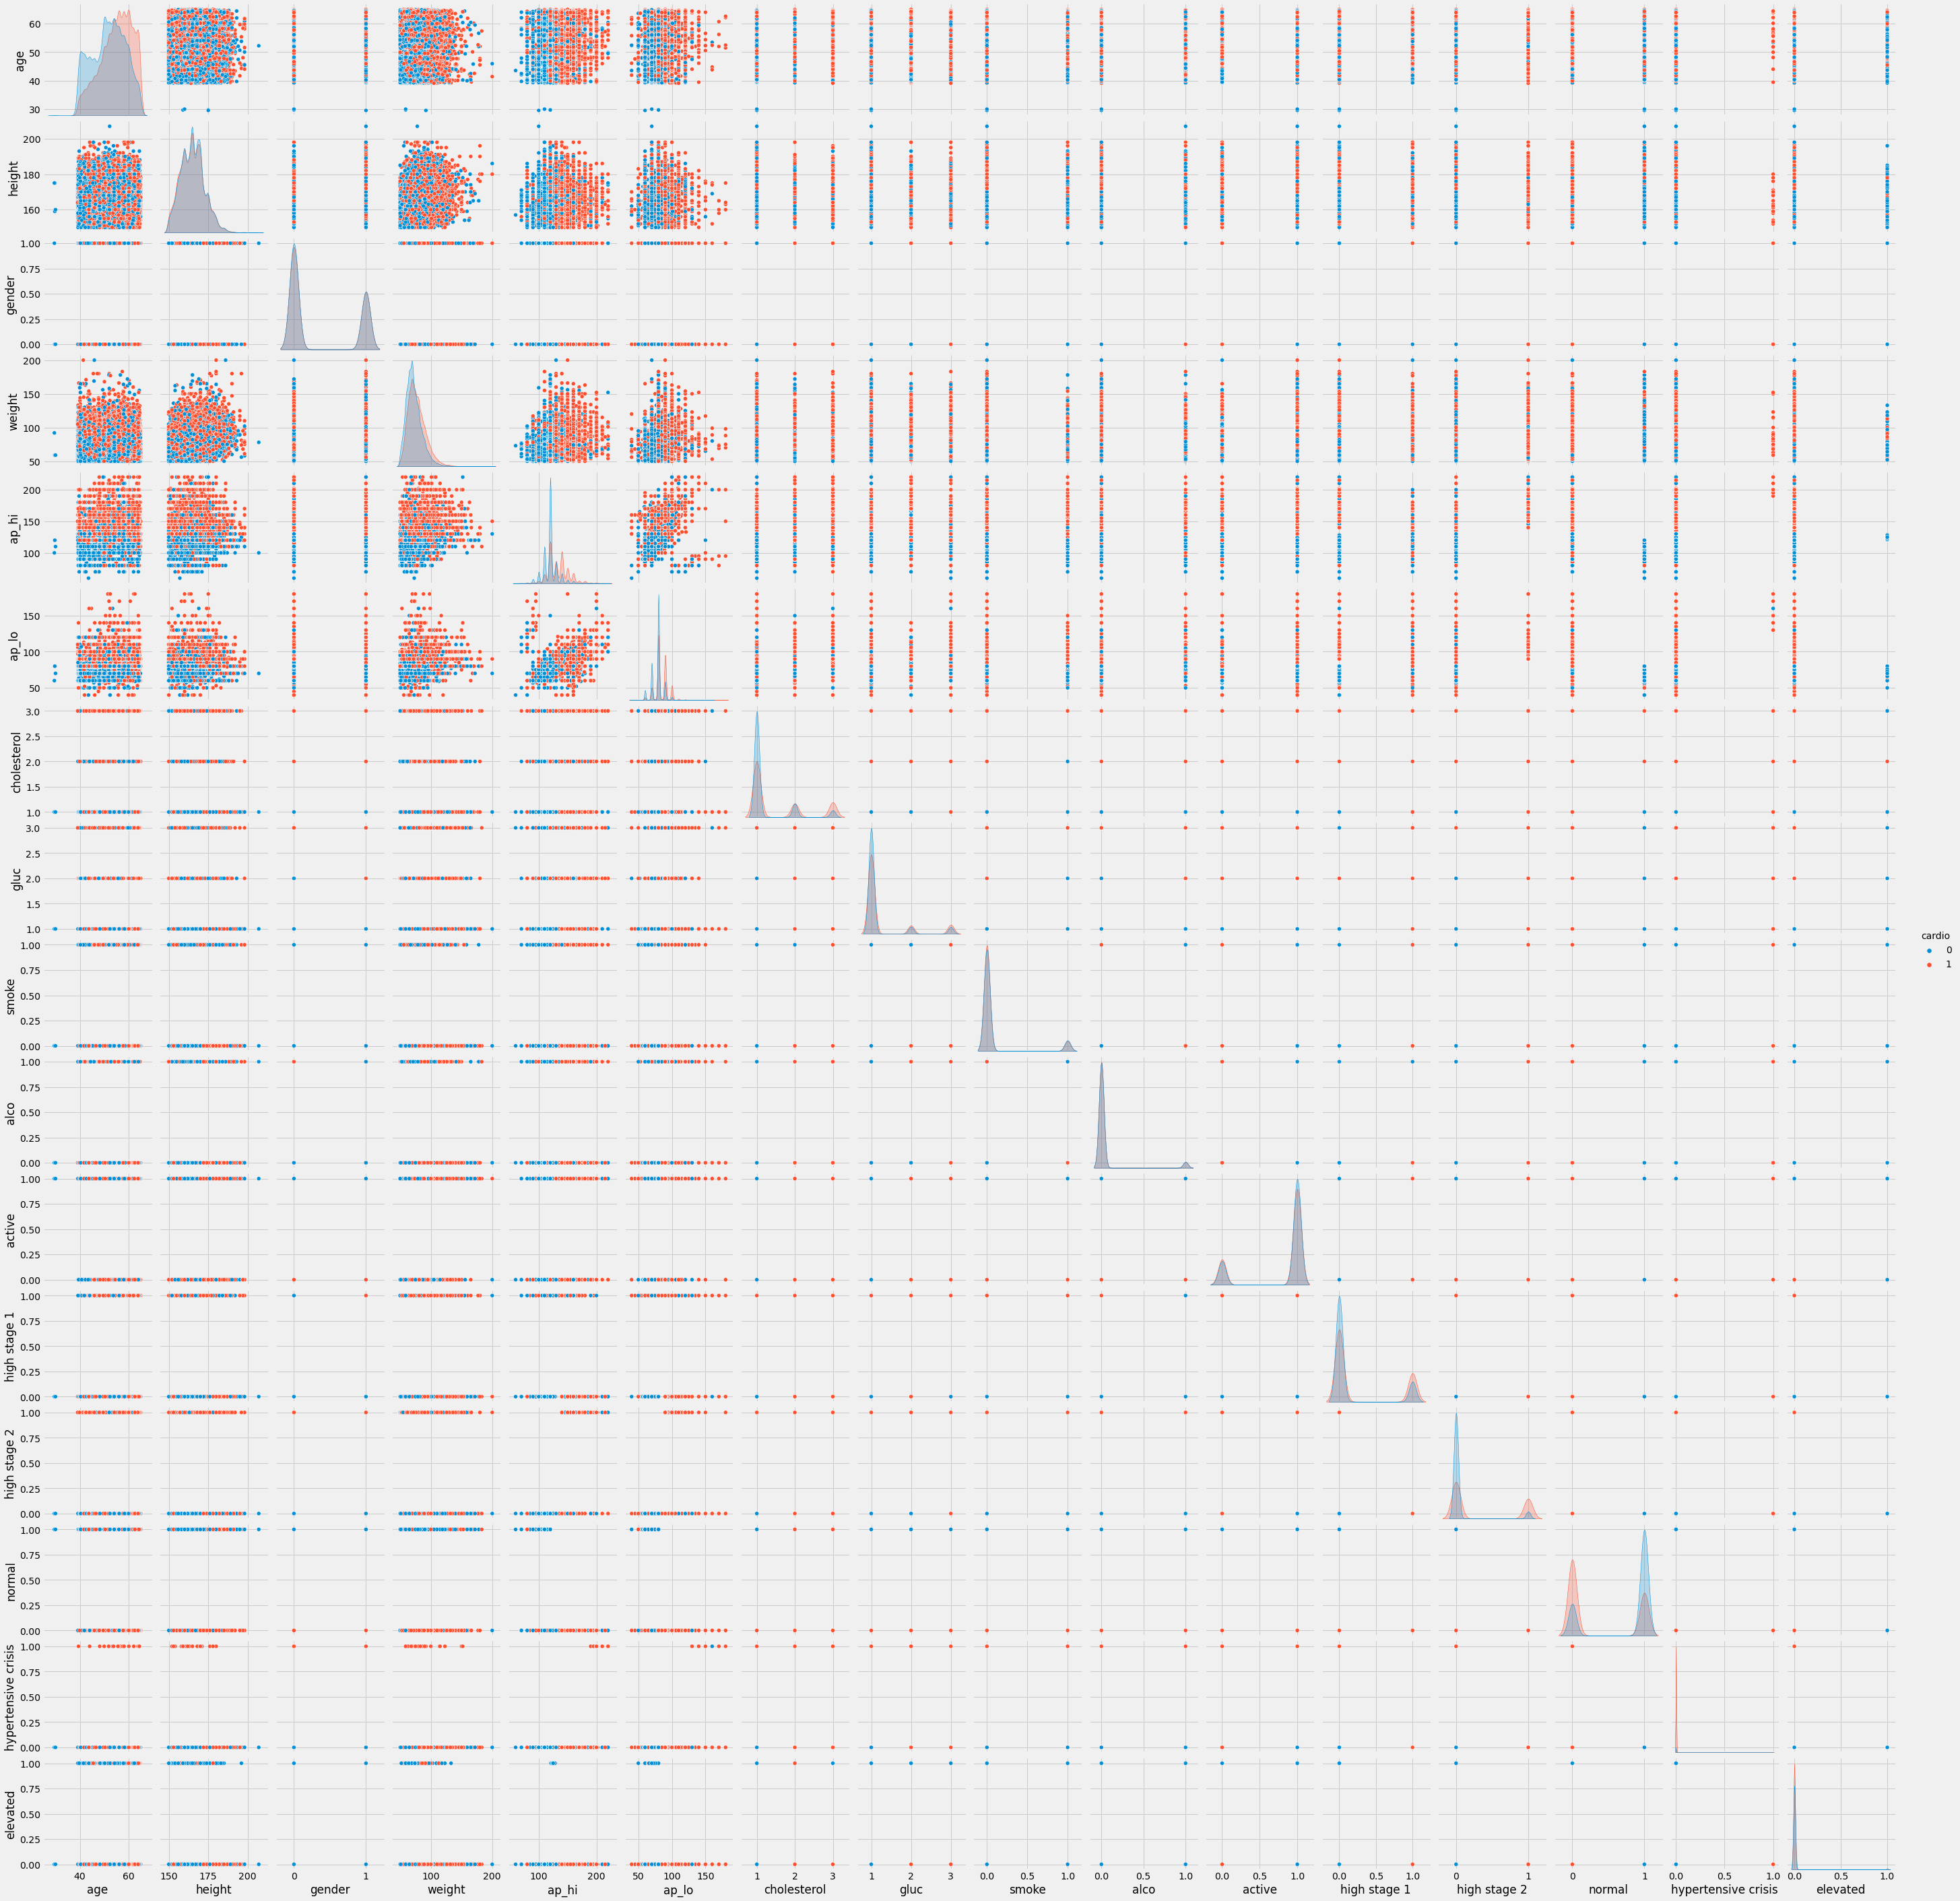

In [43]:
sns.pairplot(train_df, hue='cardio');

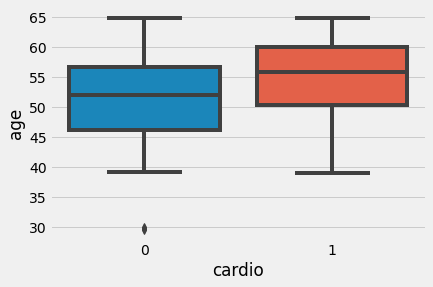

In [44]:
sns.boxplot(x='cardio', y='age', data=train_df);

In [90]:
# Logistic Regression

lr = LogisticRegression()
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

fit=lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7257882459176763

In [91]:
lr.score(X_train, y_train)

0.7232841661649608

In [92]:
lr.intercept_
lr.coef_

array([[ 0.35789189, -0.01927398,  0.00186093,  0.14136169,  0.54049612,
         0.03365692,  0.3238636 , -0.07238889, -0.0481918 , -0.04399185,
        -0.08480496,  0.03083121,  0.27197808, -0.24000102, -0.00430334,
        -0.04948742]])

In [93]:
y_pred = lr.predict(X_test)

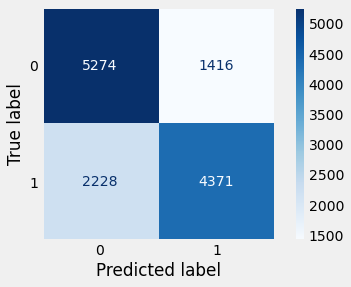

In [94]:
plot_confusion_matrix(lr, X_test, y_test, cmap= "Blues", values_format= '.5g')
plt.grid(False)
plt.show()

In [125]:
def make_confusion_matrix(model, threshold=0.5):
    
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['0', '1'],
           yticklabels=['0', '1']);
    plt.xlabel('prediction')
    plt.ylabel('actual')
    print("threshold={}".format(threshold))
    print('-----------------------')

threshold=0.5
-----------------------


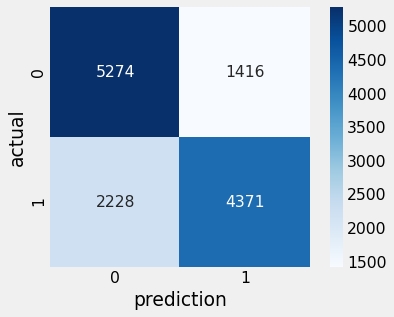

In [126]:
make_confusion_matrix(lr)

The main diagonal (5274, 4371) gives the correct predictions. That is the same cases where the actual values and the model predictions are the same. Wherease, the algorethem predict 2228 amd 1416 incorrectly for both of FN and FP.

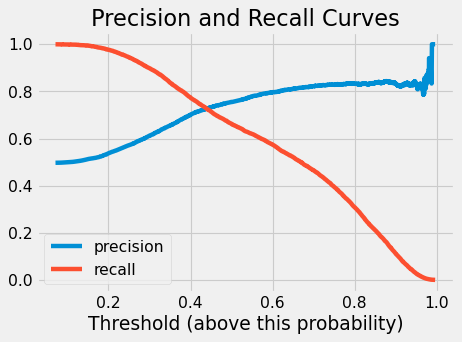

In [139]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, lr.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability)');
plt.title('Precision and Recall Curves');

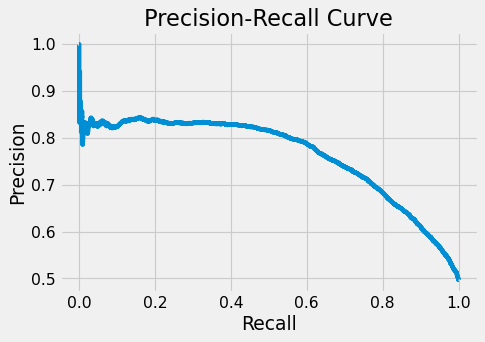

In [131]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

from the plot we can see that the more recall we have the lower precision.

In [134]:
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])

ROC AUC score =  0.7916054794731548


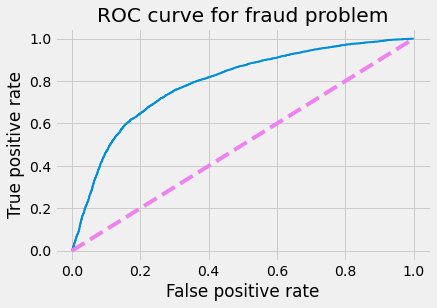

In [136]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("ROC AUC score = ", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))



In [50]:
# KNN

knn = KNeighborsClassifier(n_neighbors=100)

knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.7269922492286853

In [51]:
knn.score(X_train, y_train)

0.7321455448524985

In [95]:
knn.predict(X_test)

array([1, 1, 0, ..., 1, 1, 1])

In [118]:
y_predict = knn.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Default threshold:
Precision: 0.7450,   Recall: 0.6845


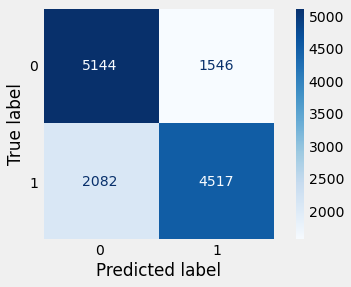

In [102]:
plot_confusion_matrix(knn, X_test, y_test, cmap= "Blues", values_format= '.5g')
plt.grid(False)
plt.show()

In [53]:
# Gradient Boosting Machines

gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', 
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

eval_set=[(X_train,y_train),(X_test,y_test)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', 
                    early_stopping_rounds=50,
                    verbose=True
                   )



[0]	validation_0-error:0.27692	validation_1-error:0.27526
[1]	validation_0-error:0.27563	validation_1-error:0.27459
[2]	validation_0-error:0.27540	validation_1-error:0.27353
[3]	validation_0-error:0.27497	validation_1-error:0.27361


/Users/muneraabdul/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[4]	validation_0-error:0.27406	validation_1-error:0.27241
[5]	validation_0-error:0.27517	validation_1-error:0.27346
[6]	validation_0-error:0.27542	validation_1-error:0.27361
[7]	validation_0-error:0.27572	validation_1-error:0.27399
[8]	validation_0-error:0.27519	validation_1-error:0.27308
[9]	validation_0-error:0.27534	validation_1-error:0.27331
[10]	validation_0-error:0.27498	validation_1-error:0.27338
[11]	validation_0-error:0.27510	validation_1-error:0.27338
[12]	validation_0-error:0.27435	validation_1-error:0.27226
[13]	validation_0-error:0.27457	validation_1-error:0.27248
[14]	validation_0-error:0.27391	validation_1-error:0.27195
[15]	validation_0-error:0.27355	validation_1-error:0.27203
[16]	validation_0-error:0.27354	validation_1-error:0.27150
[17]	validation_0-error:0.27327	validation_1-error:0.27135
[18]	validation_0-error:0.27322	validation_1-error:0.27165
[19]	validation_0-error:0.27297	validation_1-error:0.27150
[20]	validation_0-error:0.27269	validation_1-error:0.27120
[21

In [54]:
accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)) 

0.7379035292347054

In [55]:
accuracy_score(y_train, gbm.predict(X_train, ntree_limit=gbm.best_ntree_limit)) 

0.7351934075857917

In [120]:
y_predict = gbm.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Default threshold:
Precision: 0.7613,   Recall: 0.6878


threshold=0.5
-----------------------


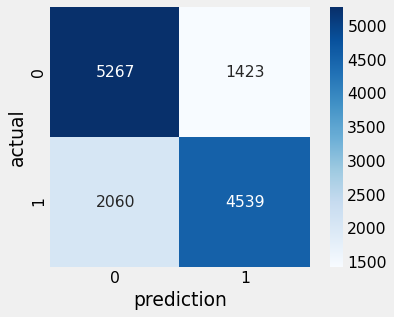

In [128]:
make_confusion_matrix(gbm)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

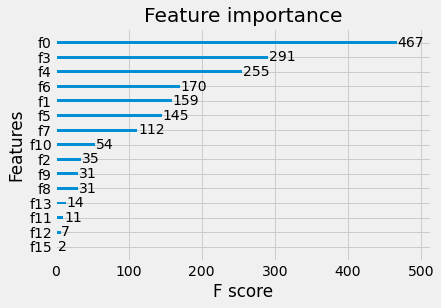

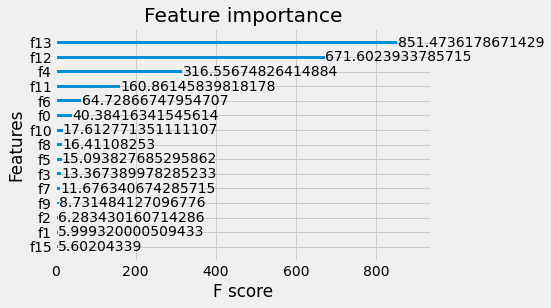

In [57]:
xgb.plot_importance(gbm)
xgb.plot_importance(gbm, importance_type='gain')

Gain views that normal blood pressure is the most important featuer while in frequency is the least important.

In [58]:
# Random Forest
rf= RandomForestClassifier(criterion = "entropy")
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.7090074497704869

In [59]:
rf.score(X_train, y_train)

0.9997366044551474

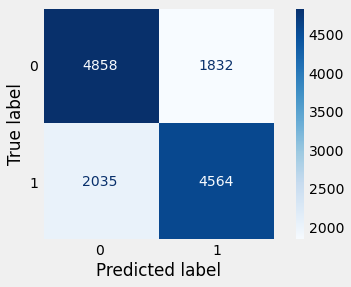

In [60]:
plot_confusion_matrix(rf, X_test, y_test, cmap= "Blues", values_format= '.5g')
plt.grid(False)
plt.show()

In here we can see that 4872 patients who dont have CD and the algorithm classify them that they didnt, however it missclassified 1818 of patients who actully didnt have heart disease but the algorthem says that the do have "FN". also the algorathem missclassified 2019 of patient that did have heart but it classified that they dont have "FP". On the other hand, there are 4580 patients who actully have CD and it classifies them correctly.

In [61]:
X = df.drop(["active"], axis = 1).values
y = df["active"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

In [62]:
# Naive Bayes

nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.8027812895069533

In [63]:
nb.score(X_train, y_train)

0.8026490066225166

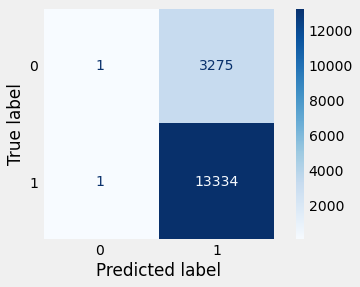

In [64]:
plot_confusion_matrix(nb, X_test, y_test, cmap= "Blues", values_format= '.5g')
plt.grid(False)
plt.show()

In [119]:
y_predict = nb.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Default threshold:
Precision: 0.4966,   Recall: 1.0000


In [56]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.79      0.74      6690
           1       0.76      0.66      0.71      6599

    accuracy                           0.73     13289
   macro avg       0.73      0.73      0.72     13289
weighted avg       0.73      0.73      0.72     13289



In [65]:
# Dummy 

X=df[['age','height','gender','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','high stage 1','high stage 2','normal','hypertensive crisis','elevated']]
y=df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=43)
dummys= DummyClassifier(strategy="most_frequent")
dummys.fit(X_train, y_train)
dummys.score(X_test,y_test)

0.5034238844156821